In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2

## Downloading the dataset


In [2]:
# kaggle dataset API
!kaggle datasets download -d hamzahabib47/brain-cancer-detection-mri-images

Dataset URL: https://www.kaggle.com/datasets/hamzahabib47/brain-cancer-detection-mri-images
License(s): CC0-1.0
 36% 5.00M/13.9M [00:00<00:00, 23.6MB/s]
100% 13.9M/13.9M [00:00<00:00, 46.6MB/s]


In [5]:
# extracting the dataset
with ZipFile('brain-cancer-detection-mri-images.zip', 'r') as zip:
  zip.extractall()
  print("The dataset has been extracted...")

The dataset has been extracted...


In [7]:
healthy_files = os.listdir('Dataset/healthy')
tumor_files = os.listdir('Dataset/tumor')

print('No. of healthy files: ', len(healthy_files))
print('No. of tumor files: ', len(tumor_files))

No. of healthy files:  408
No. of tumor files:  392


## Creating Labels
- healthy == 0
- tumor == 1

In [8]:
healthy = [0] * 408
tumor = [1] * 392

labels = healthy + tumor

In [9]:
len(labels)

800

## Image Preprocessing


In [19]:
data_path = "Dataset"
categories = ['healthy/', 'tumor/']
data = []

for category in categories:
  img_path = os.path.join(data_path, category)

  for img_file in os.listdir(img_path):
    image = Image.open(img_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)

    data.append(image)

In [20]:
len(data)

800

In [21]:
X = np.array(data)
y = np.array(labels)

In [22]:
# scaling the X values
X = X/255

In [23]:
print(X.shape)
print(y.shape)

(800, 128, 128, 3)
(800,)


## Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=labels)

## Creating the CNN Model

In [25]:
num_of_classes = 2

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_of_classes, activation="sigmoid") # sigmoid for 2 classes & softmax for more than 2 classes
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer="adam",
    metrics=["accuracy"]
)

In [27]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 818ms/step - accuracy: 0.6116 - loss: 0.7897
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 861ms/step - accuracy: 0.8463 - loss: 0.4975
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 975ms/step - accuracy: 0.8500 - loss: 0.3705
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 838ms/step - accuracy: 0.8882 - loss: 0.3135
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 825ms/step - accuracy: 0.9241 - loss: 0.1892


## Evaluating the Model on test data

In [28]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - accuracy: 0.9076 - loss: 0.2632


[0.2561797797679901, 0.90625]

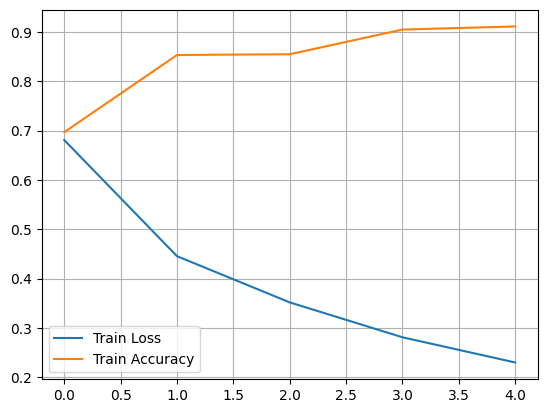

In [29]:
h = history

plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['accuracy'], label='Train Accuracy')

plt.grid(True)
plt.legend()
plt.show()

## Predictive System

Path of the image to be predicted: yes3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.42485222 0.53994787]]
Yes! Brain Cancer.


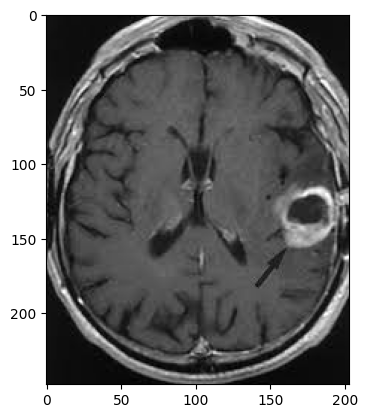

In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = plt.imread(input_image_path) # or plt.imread()

plt.imshow(input_image) # or plt.imshow()

input_image_resize = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print("Yes! Brain Cancer.")
else:
  print("No Cancer Detected!")

In [46]:
model.save('Brain_Cancer_Detection.h5')